In [26]:
import pandas as pd
import matplotlib.pyplot as plt

## Sessile Biomass

In [52]:

m_df = pd.read_csv('Mtot_fraction.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'M']) 

print(m_df.head())


       time         M
0       0.0  0.000750
1   25000.0  0.001299
2   50000.0  0.002015
3   75000.0  0.002839
4  100000.0  0.003712


## EPS

In [53]:

eps_df = pd.read_csv('EPS_fraction.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'EPS']) 

print(eps_df.head())


       time       EPS
0       0.0  0.000000
1   25000.0  0.000066
2   50000.0  0.000153
3   75000.0  0.000322
4  100000.0  0.000540


## Merge

In [54]:
df = m_df.merge(eps_df, on='time')
df

,time,M,EPS
0,0.0,0.000750,0.000000
1,25000.0,0.001299,0.000066
2,50000.0,0.002015,0.000153
3,75000.0,0.002839,0.000322
4,100000.0,0.003712,0.000540
...,...,...,...
205,5125000.0,0.017397,0.030813
206,5150000.0,0.017406,0.030975
207,5175000.0,0.017414,0.031127
208,5200000.0,0.017423,0.031274


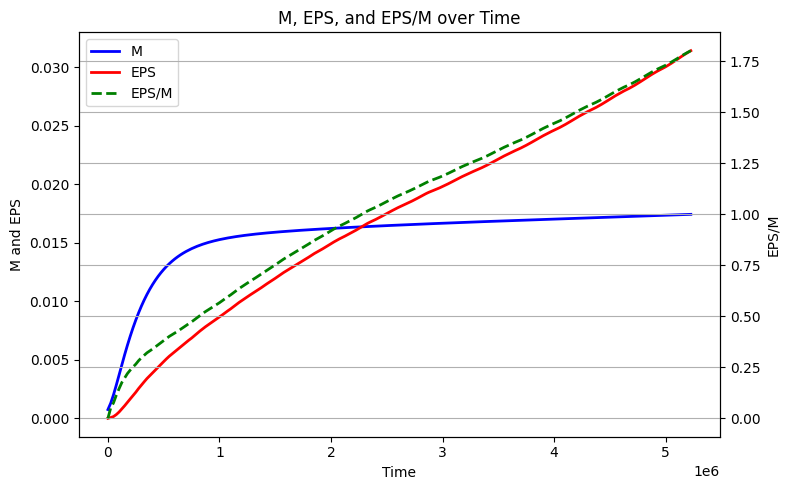

In [55]:
df['EPS_over_M'] = df['EPS'] / df['M']

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(df['time'], df['M'], label='M', color='blue', linewidth=2)
ax1.plot(df['time'], df['EPS'], label='EPS', color='red', linewidth=2)
ax1.set_xlabel('Time')
ax1.set_ylabel('M and EPS', color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(df['time'], df['EPS_over_M'], label='EPS/M', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('EPS/M')
ax2.tick_params(axis='y')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('M, EPS, and EPS/M over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:

biomass_df = pd.read_csv('biomass.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'B']) 

print(biomass_df.head())


       time         B
0       0.0  0.002500
1   25000.0  0.005278
2   50000.0  0.007083
3   75000.0  0.008819
4  100000.0  0.009236


<AxesSubplot:xlabel='time'>

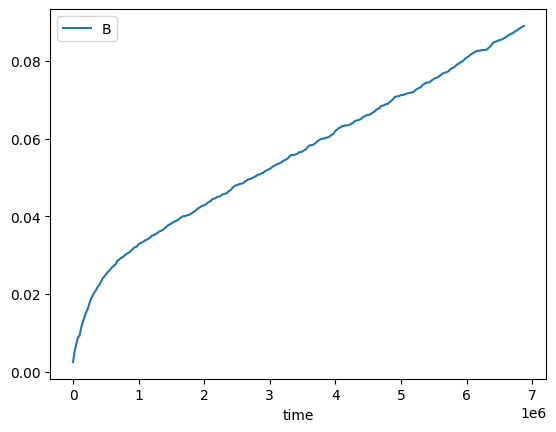

In [57]:
biomass_df.plot(x='time', y='B')